# 하이퍼파라미터 최적화
- 모델에 가장 적합한 하이퍼 파라미터(Hyper Parameter)를 찾기 위해서 사용
    - Hyper Parameter 는 모델의 외적인 요소로 사용자에 의해 결정되는 값
        - 예) 규제 강도, 트리 최대 깊이 등
    - Parameter는 모델의 내적인 요소로 학습을 통해 결정되는 값
        - 예) 회귀 모델의 가중치, 트리 모델의 특성 중요도 등

- 값을 어떻게 설정하느냐에 따라 모델의 성능을 개선시킬 수도, 저하시킬 수도 있음

- Objective Function을 optimize 하는 방향으로 범위 및 간격을 설정
    - Objective Function : 최대화(점수)하거나 최소화(Loss, Cost)해야 하는 값
    - Search Boundary : 탐색 범위 설정
    - Step : 탐색 시 간격


In [1]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  

In [8]:
# 회귀 데이터 가져오기
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [9]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


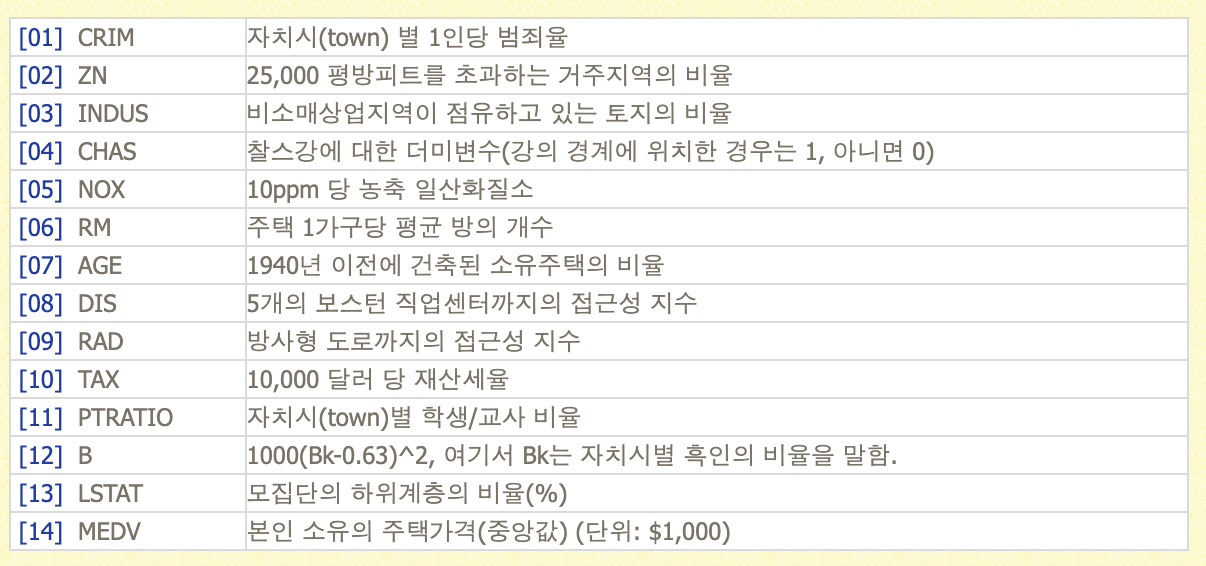

In [10]:
df.rename(columns = {'medv': 'target'}, inplace = True)

In [11]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
# 데이터 분리
X = df.loc[:, 'crim':'lstat']
Y = df['target']

In [13]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# 그리드 서치
- `sklearn.model_selection.GridSearchCV`
- 간단하고 광범위하게 사용되는 hyperparameter 탐색 알고리즘
- 해당 범위 및 Step의 모든 경우의 수를 탐색
- 범위를 넓게 가져갈수록, Step을 작게 설정할 수록 최적해를 찾을 가능성이 높이지지만 시간이 오래 걸림
- 일반적으로 넓은 범위와 큰 Step으로 설정한 후 범위를 좁혀 나가는 방식을 사용하여 시간을 단축

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor() # 실험에 사용할 모델 생성

params = {
    'random_state' : [0],
    'n_estimators': [100, 300, 500, 1000],  # 모델에 사용될 약한 학습기의 개수.
    'learning_rate': [0.1, 0.01, 0.001]  # 학습률 (작으면 학습 과정을 더 조심스럽게 진행, 더 나은 일반화 성능을 제공할 수 있음. 크면 빠르게 학습하지만 과적합을 일으킬 수 있음.)
} # 실험할 파라미터 범위 설정

In [16]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(model, params, cv=5)  # 실험에 사용할 모델, 실험에 사용할 파라미터의 조합, 교차 검증 Fold 개수(default=5)
gs.fit(x_train, y_train) # 모든 조합 실험

# gs = GridSearchCV(model, params).fit(x_train, y_train) # 이렇게 한 줄에 적어주어도 됩니다!

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 300, 500, 1000],
                         'random_state': [0]})

In [17]:
# 실험 결과 조회 (dict 형태)
gs.cv_results_

{'mean_fit_time': array([0.07022462, 0.18313456, 0.29985137, 0.60923114, 0.06128278,
        0.18749018, 0.30647244, 0.61615338, 0.06127739, 0.18275337,
        0.30267577, 0.61216664]),
 'std_fit_time': array([0.01685761, 0.00429794, 0.00409056, 0.00945223, 0.00125392,
        0.0065584 , 0.01174042, 0.02097641, 0.00052384, 0.00159116,
        0.00174649, 0.01090282]),
 'mean_score_time': array([0.00104356, 0.0010355 , 0.00106797, 0.00166326, 0.0006834 ,
        0.00099978, 0.0010972 , 0.00146923, 0.00065455, 0.00084262,
        0.00091586, 0.00125904]),
 'std_score_time': array([6.92522591e-04, 3.34648428e-04, 7.75302028e-05, 1.48022681e-04,
        1.58751873e-04, 1.94119031e-04, 3.53023774e-05, 5.56733878e-05,
        6.95980709e-05, 4.00351297e-05, 6.40918809e-05, 2.84901324e-05]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.001,
                    0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, Fals

In [18]:
# 실험 결과 조회 (DataFrame 형태)
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070225,0.016858,0.001044,0.000693,0.1,100,0,"{'learning_rate': 0.1, 'n_estimators': 100, 'r...",0.939724,0.735255,0.921386,0.865721,0.904609,0.873339,0.073237,2
1,0.183135,0.004298,0.001035,0.000335,0.1,300,0,"{'learning_rate': 0.1, 'n_estimators': 300, 'r...",0.933410,0.729845,0.925293,0.871884,0.900679,0.872222,0.074353,3
2,0.299851,0.004091,0.001068,0.000078,0.1,500,0,"{'learning_rate': 0.1, 'n_estimators': 500, 'r...",0.931753,0.729151,0.924910,0.873152,0.899244,0.871642,0.074187,4
3,0.609231,0.009452,0.001663,0.000148,0.1,1000,0,"{'learning_rate': 0.1, 'n_estimators': 1000, '...",0.930644,0.727434,0.925533,0.873994,0.899271,0.871375,0.074766,5
4,0.061283,0.001254,0.000683,0.000159,0.01,100,0,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.744802,0.591066,0.737597,0.638498,0.682822,0.678957,0.058568,8
5,0.187490,0.006558,0.001000,0.000194,0.01,300,0,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.905289,0.701214,0.910204,0.846294,0.875280,0.847656,0.076739,7
6,0.306472,0.011740,0.001097,0.000035,0.01,500,0,"{'learning_rate': 0.01, 'n_estimators': 500, '...",0.928386,0.717055,0.916345,0.861141,0.895927,0.863771,0.076819,6
7,0.616153,0.020976,0.001469,0.000056,0.01,1000,0,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",0.934656,0.738743,0.924387,0.866537,0.905796,0.874024,0.071525,1
8,0.061277,0.000524,0.000655,0.000070,0.001,100,0,"{'learning_rate': 0.001, 'n_estimators': 100, ...",0.143016,0.078216,0.120480,0.116796,0.137385,0.119178,0.022737,12
9,0.182753,0.001591,0.000843,0.000040,0.001,300,0,"{'learning_rate': 0.001, 'n_estimators': 300, ...",0.369596,0.279795,0.350343,0.321289,0.345843,0.333373,0.030894,11


In [19]:
# 최고 성능 점수 조회
gs.best_score_

0.8740236132423307

In [20]:
# 최고 성능 파라미터 조회
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000, 'random_state': 0}

In [21]:
# 최고 성능 모델 조회
gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, random_state=0)

In [22]:
# 최고 성능 모델 평가
gs.best_estimator_.score(x_test, y_test)

0.8123391177338997

# 랜덤 서치
- `sklearn.model_selection.RandomizedSearchCV`
- 정해진 범위 내에서 Random하게 선택 
- 기본적으로는 더 빠르고 효율적이기 때문에 GridSearch보다 권장되는 방법 
- Grid Serach보다 속도가 빠르지만 optimzed solution이 아닐 수 있음 
- Sample의 수가 많다면 Random Sampling을 통해 최적해를 찾을 가능성이 높아짐


In [23]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(model, params).fit(x_train, y_train) # 모든 조합 실험

In [24]:
# 실험 결과 조회 (DataFrame 형태)
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068844,0.017053,0.000659,0.000067,0,100,0.1,"{'random_state': 0, 'n_estimators': 100, 'lear...",0.939724,0.735255,0.921386,0.865721,0.904609,0.873339,0.073237,2
1,0.624560,0.037501,0.001291,0.000203,0,1000,0.001,"{'random_state': 0, 'n_estimators': 1000, 'lea...",0.742866,0.591613,0.736314,0.639823,0.679493,0.678022,0.057499,9
2,0.060758,0.000214,0.000562,0.000010,0,100,0.001,"{'random_state': 0, 'n_estimators': 100, 'lear...",0.143016,0.078216,0.120480,0.116796,0.137385,0.119178,0.022737,10
3,0.302481,0.002787,0.001097,0.000071,0,500,0.1,"{'random_state': 0, 'n_estimators': 500, 'lear...",0.931753,0.729151,0.924910,0.873152,0.899244,0.871642,0.074187,4
4,0.599518,0.006454,0.001477,0.000068,0,1000,0.1,"{'random_state': 0, 'n_estimators': 1000, 'lea...",0.930644,0.727434,0.925533,0.873994,0.899271,0.871375,0.074766,5
5,0.179093,0.000683,0.000798,0.000017,0,300,0.1,"{'random_state': 0, 'n_estimators': 300, 'lear...",0.933410,0.729845,0.925293,0.871884,0.900679,0.872222,0.074353,3
6,0.060669,0.000222,0.000587,0.000006,0,100,0.01,"{'random_state': 0, 'n_estimators': 100, 'lear...",0.744802,0.591066,0.737597,0.638498,0.682822,0.678957,0.058568,8
7,0.608311,0.011721,0.001437,0.000035,0,1000,0.01,"{'random_state': 0, 'n_estimators': 1000, 'lea...",0.934656,0.738743,0.924387,0.866537,0.905796,0.874024,0.071525,1
8,0.179353,0.000741,0.000772,0.000023,0,300,0.01,"{'random_state': 0, 'n_estimators': 300, 'lear...",0.905289,0.701214,0.910204,0.846294,0.875280,0.847656,0.076739,7
9,0.297887,0.000807,0.000916,0.000032,0,500,0.01,"{'random_state': 0, 'n_estimators': 500, 'lear...",0.928386,0.717055,0.916345,0.861141,0.895927,0.863771,0.076819,6


In [25]:
# 최고 성능 점수 조회


0.8740236132423307

In [26]:
# 최고 성능 파라미터 조회


{'learning_rate': 0.01, 'n_estimators': 1000, 'random_state': 0}

In [27]:
# 최고 성능 모델 조회


GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, random_state=0)

In [28]:
# 최고 성능 모델 평가


0.8123391177338997

# 모델 저장하기

In [33]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, random_state=0)

In [34]:
import pickle

model =rs.best_estimator_

# 모델을 pickle 파일로 저장
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [35]:
# 저장된 pickle 파일로부터 모델 불러오기
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 불러온 모델을 사용하여 예측
print(loaded_model.predict(x_test))

[24.02995554 30.8936109  22.7688175  11.25181654 21.92917288 20.55687843
 21.34041522 20.78102527 22.68667692 18.43075634  7.35512803 13.8848366
 15.63615032  9.91232909 48.57606953 34.09680665 21.00909959 36.3223261
 27.06005924 22.10475849 23.45442665 21.64093982 19.97394932 24.64528334
 20.58621659 19.56677035 18.140573   16.62478478 39.90992355 18.76365327
 16.39345579 17.89978937 19.66036764 21.40887686 23.90008254 17.06998354
 10.01749197 30.71317821 14.71606235 14.99809514 22.9819639  21.08466976
 22.16761639 16.14922254 22.13705815 20.39313667 19.26575942 16.63700627
 15.43100829 23.55861436 15.58260128 19.97979086 21.27815106 38.4393871
 15.2723574  19.32158145 19.51173928 18.38010816 21.79286128 19.29503569
 22.56191058 21.18850179 32.73355043 29.36053333 18.98114415 27.75297825
 16.21706387 18.78629929 15.28024715 22.87964851 20.90774126 22.87228049
 25.60951932 31.17221163 26.63741201  9.66737532 41.81724201 22.73418998
 22.91899204 20.90661312 26.86056126 17.75032732 20.61